In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN

In [92]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("robinreni/signature-verification-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/robinreni/signature-verification-dataset/versions/2


In [93]:
train_path = path +'/sign_data/train'

# Run into every folder in the path to get the jpg
real_train_images = []
forge_train_images = []
for folder in os.listdir(train_path):
    for file in os.listdir(os.path.join(train_path, folder)):
        if file.endswith(".png" or ".PNG"):
            img = cv2.imread(os.path.join(train_path, folder, file), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (128, 128))
            if folder.endswith("_forg"):
                forge_train_images.append(img)
            else:
                real_train_images.append(img)

# Convert the lists to numpy arrays
real_train_images = np.array(real_train_images)
forge_train_images = np.array(forge_train_images)

# Normalize the data
real_train_images = real_train_images.astype('float32') / 255.0
forge_train_images = forge_train_images.astype('float32') / 255.0

print(len(real_train_images))
print(len(forge_train_images))

648
123


In [94]:
real_labels = np.zeros(len(real_train_images), dtype=int)
forge_labels = np.ones(len(forge_train_images), dtype=int)

images = np.concatenate((real_train_images, forge_train_images), axis=0)
labels = np.concatenate((real_labels, forge_labels), axis=0)

In [95]:
print(images.shape)
print(labels.shape)
print("the label values from: ", np.min(labels), "to", np.max(labels))

(771, 128, 128)
(771,)
the label values from:  0 to 1


In [96]:
model = Sequential(name="SimpleRNN")
model.add(SimpleRNN(units=128, activation='relu', input_shape=(128, 128)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "SimpleRNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_14 (SimpleRNN)            │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,537 (193.50 KB)

 Trainable params: 49,537 (193.50 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [98]:
#It's possible to use images with recurrent neural networks (RNNs), it's not the typical approach. RNNs are better suited for sequential data like text or time series.
#However, you can still incorporate images into RNNs for tasks like sequential image data analysis, image captioning, visual question answering, or by using attention mechanisms.
#For primary image processing tasks, convolutional neural networks (CNNs) are more commonly used due to their ability to capture spatial patterns effectively.

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.7068 - loss: 0.6324 - val_accuracy: 0.8323 - val_loss: 0.4642
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8532 - loss: 0.4241 - val_accuracy: 0.8323 - val_loss: 0.4529
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8543 - loss: 0.4395 - val_accuracy: 0.8323 - val_loss: 0.4531
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8335 - loss: 0.4543 - val_accuracy: 0.8323 - val_loss: 0.4546
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8684 - loss: 0.3992 - val_accuracy: 0.8323 - val_loss: 0.4599
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.8413 - loss: 0.4609 - val_accuracy: 0.8323 - val_loss: 0.4575
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.8586 - loss: 0.4149 - val_accuracy: 0.8323 - val_loss: 0.4530
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.8362 - loss: 0.4562 - val_accuracy: 0.8323 - 

In [ ]:
model.save("../models/RNN.h5")

In [99]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)
print("Test loss:", test_loss)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8035 - loss: 0.5023
Test accuracy: 0.8322580456733704
Test loss: 0.4529281556606293


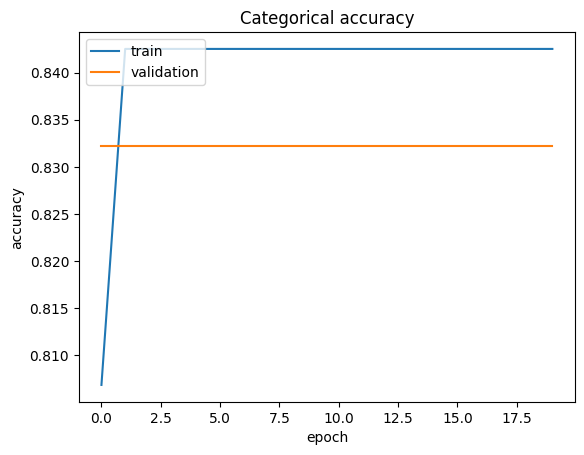

In [100]:
def plot_hist(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Categorical accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

plot_hist(history)

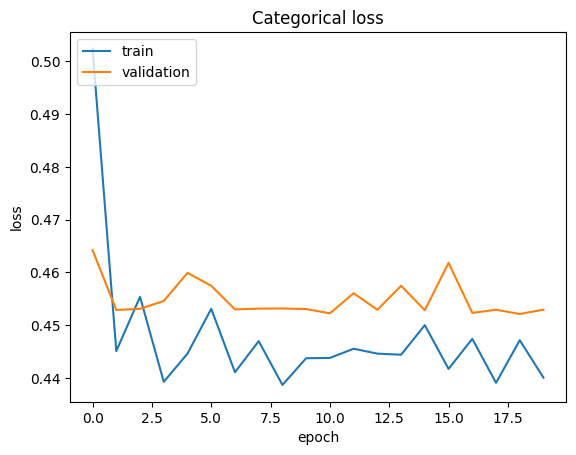

In [101]:
def plot_hist(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Categorical loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

plot_hist(history)

In [102]:
def predict_signature(image_path, model):
    """Predicts whether a signature is real or forged.

    Args:
        image_path: The path to the image file.
        model: The trained signature verification model.

    Returns:
        A string indicating whether the signature is real or forged.
    """

    # Load and preprocess the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Show image
    plt.imshow(img, cmap='gray')
    plt.title('Signature Image')
    plt.axis('off')
    plt.show()

    # Resize, reshape and normalize the input image
    img = cv2.resize(img, (128, 128))
    img = np.array(img).reshape(1, 128, 128, 1) / 255.0

    # Predict the class of the signature image
    prediction = model.predict(img)

    # Determine the prediction label
    if prediction < 0.5:
        return "The signature is real."
    else:
        return "The signature is forged."


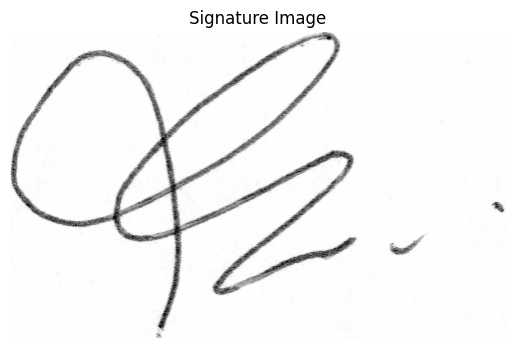

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
The signature is real.


In [103]:
image_path = path + '/sign_data/test/049_forg/01_0114049.PNG'

prediction_result = predict_signature(image_path, model)
print(prediction_result)